In [17]:
%reset -f
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
plt.style.use('seaborn')
%matplotlib inline

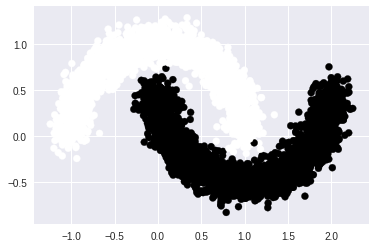

In [18]:
X,y = datasets.make_moons(n_samples=5000, 
                          shuffle=True, 
                          noise=0.1, 
                          random_state=1234)
Y = np.reshape(y, (len(y),1))

plt.figure()
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()


In [19]:
class NeuralNetwork(torch.nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.l1 = torch.nn.Linear(2, 3)
        self.l2 = torch.nn.Linear(3, 3)
        self.l3 = torch.nn.Linear(3, 1)
        self.sigmoid = torch.nn.Sigmoid()
    
    def forward(self, x):
        out1 = self.sigmoid(self.l1(x))
        out2 = self.sigmoid(self.l2(out1))
        out3 = self.sigmoid(self.l3(out2))
        return out3   


In [33]:
m = torch.nn.Linear(2, 4, bias=True)
print(m.weight)
print(m.bias)

Parameter containing:
tensor([[-0.0670,  0.1546],
        [ 0.4726, -0.2933],
        [ 0.2071,  0.4499],
        [-0.2031, -0.5617]], requires_grad=True)
Parameter containing:
tensor([ 0.3566,  0.6660, -0.5156,  0.5648], requires_grad=True)


In [20]:
model = NeuralNetwork()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device
model.to(device)

NeuralNetwork(
  (l1): Linear(in_features=2, out_features=3, bias=True)
  (l2): Linear(in_features=3, out_features=3, bias=True)
  (l3): Linear(in_features=3, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

In [21]:
inputs = torch.tensor(X, dtype=torch.float).to(device=device)
labels = torch.tensor(y, dtype=torch.float).to(device=device)

In [22]:
criterion = torch.nn.BCELoss(size_average=True)
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

/home/joshhu/anaconda3/envs/pytorch/lib/python3.6/site-packages/torch/nn/_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


In [23]:
#store all the loss values
losses = []

In [34]:
for epoch in range(10000):
    y_pred = model(inputs)
    loss = criterion(y_pred, labels)
    losses.append(loss)
    if not epoch%500: print(epoch, loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

/home/joshhu/anaconda3/envs/pytorch/lib/python3.6/site-packages/torch/nn/functional.py:2016: UserWarning: Using a target size (torch.Size([5000])) that is different to the input size (torch.Size([5000, 1])) is deprecated. Please ensure they have the same size.
  "Please ensure they have the same size.".format(target.size(), input.size()))


0 0.000633152318187058
500 0.0006209302227944136
1000 0.0006080105085857213
1500 0.0005941043491475284
2000 0.0005793907912448049
2500 0.0005646852077916265
3000 0.0005512265488505363
3500 0.0018824819708243012
4000 0.0006640790379606187
4500 0.0006071345414966345
5000 0.0005913840141147375
5500 0.0005809802678413689
6000 0.0005727164098061621
6500 0.0005656644934788346
7000 0.0005592546658590436
7500 0.0005531893111765385
8000 0.0005473589990288019
8500 0.0005578326527029276
9000 0.0005465844296850264
9500 0.0005430454039014876


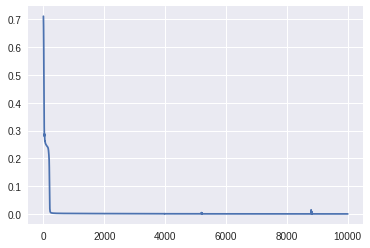

In [25]:
plt.plot(losses)

tensor([[1.]], device='cuda:0', grad_fn=<SigmoidBackward>)


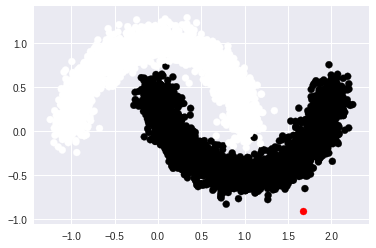

In [52]:
test = torch.randn(1,2, dtype=torch.float).to(device=device)
print(model.forward(test))
test2 = test.cpu().numpy()
plt.figure()
plt.scatter(X[:,0], X[:,1], c=y)
plt.scatter(test2[0][0], test2[0][1],c='red')
plt.show()

Parameter containing:
tensor([[ 0.0024,  0.0439],
        [-0.1166, -0.7011],
        [-0.6868,  0.5977],
        [-0.3357, -0.1304]], requires_grad=True)
Parameter containing:
tensor([-0.6045, -0.5196,  0.2144,  0.3267], requires_grad=True)


In [394]:
import math
z = [1.0, 2.0, 3.0, 4.0, 1.0, 2.0, 3.0]
z_exp = [math.exp(i) for i in z]  
print(z_exp)  # Result: [2.72, 7.39, 20.09, 54.6, 2.72, 7.39, 20.09] 
sum_z_exp = sum(z_exp)  
print(sum_z_exp)  # Result: 114.98 
softmax = [round(i / sum_z_exp, 3) for i in z_exp]
print(softmax)  #

[2.718281828459045, 7.38905609893065, 20.085536923187668, 54.598150033144236, 2.718281828459045, 7.38905609893065, 20.085536923187668]
114.98389973429897
[0.024, 0.064, 0.175, 0.475, 0.024, 0.064, 0.175]
